In \[1\]:

    # Import necessary libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In \[2\]:

    # Load the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
    data = pd.read_csv(url, header=None)

In \[3\]:

    data

Out\[3\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     | 60  |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|
| 0   | 0.0200 | 0.0371 | 0.0428 | 0.0207 | 0.0954 | 0.0986 | 0.1539 | 0.1601 | 0.3109 | 0.2111 | ... | 0.0027 | 0.0065 | 0.0159 | 0.0072 | 0.0167 | 0.0180 | 0.0084 | 0.0090 | 0.0032 | R   |
| 1   | 0.0453 | 0.0523 | 0.0843 | 0.0689 | 0.1183 | 0.2583 | 0.2156 | 0.3481 | 0.3337 | 0.2872 | ... | 0.0084 | 0.0089 | 0.0048 | 0.0094 | 0.0191 | 0.0140 | 0.0049 | 0.0052 | 0.0044 | R   |
| 2   | 0.0262 | 0.0582 | 0.1099 | 0.1083 | 0.0974 | 0.2280 | 0.2431 | 0.3771 | 0.5598 | 0.6194 | ... | 0.0232 | 0.0166 | 0.0095 | 0.0180 | 0.0244 | 0.0316 | 0.0164 | 0.0095 | 0.0078 | R   |
| 3   | 0.0100 | 0.0171 | 0.0623 | 0.0205 | 0.0205 | 0.0368 | 0.1098 | 0.1276 | 0.0598 | 0.1264 | ... | 0.0121 | 0.0036 | 0.0150 | 0.0085 | 0.0073 | 0.0050 | 0.0044 | 0.0040 | 0.0117 | R   |
| 4   | 0.0762 | 0.0666 | 0.0481 | 0.0394 | 0.0590 | 0.0649 | 0.1209 | 0.2467 | 0.3564 | 0.4459 | ... | 0.0031 | 0.0054 | 0.0105 | 0.0110 | 0.0015 | 0.0072 | 0.0048 | 0.0107 | 0.0094 | R   |
| ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ... |
| 203 | 0.0187 | 0.0346 | 0.0168 | 0.0177 | 0.0393 | 0.1630 | 0.2028 | 0.1694 | 0.2328 | 0.2684 | ... | 0.0116 | 0.0098 | 0.0199 | 0.0033 | 0.0101 | 0.0065 | 0.0115 | 0.0193 | 0.0157 | M   |
| 204 | 0.0323 | 0.0101 | 0.0298 | 0.0564 | 0.0760 | 0.0958 | 0.0990 | 0.1018 | 0.1030 | 0.2154 | ... | 0.0061 | 0.0093 | 0.0135 | 0.0063 | 0.0063 | 0.0034 | 0.0032 | 0.0062 | 0.0067 | M   |
| 205 | 0.0522 | 0.0437 | 0.0180 | 0.0292 | 0.0351 | 0.1171 | 0.1257 | 0.1178 | 0.1258 | 0.2529 | ... | 0.0160 | 0.0029 | 0.0051 | 0.0062 | 0.0089 | 0.0140 | 0.0138 | 0.0077 | 0.0031 | M   |
| 206 | 0.0303 | 0.0353 | 0.0490 | 0.0608 | 0.0167 | 0.1354 | 0.1465 | 0.1123 | 0.1945 | 0.2354 | ... | 0.0086 | 0.0046 | 0.0126 | 0.0036 | 0.0035 | 0.0034 | 0.0079 | 0.0036 | 0.0048 | M   |
| 207 | 0.0260 | 0.0363 | 0.0136 | 0.0272 | 0.0214 | 0.0338 | 0.0655 | 0.1400 | 0.1843 | 0.2354 | ... | 0.0146 | 0.0129 | 0.0047 | 0.0039 | 0.0061 | 0.0040 | 0.0036 | 0.0061 | 0.0115 | M   |

208 rows × 61 columns

In \[4\]:

    data.head(15)

Out\[4\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     | 60  |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|
| 0   | 0.0200 | 0.0371 | 0.0428 | 0.0207 | 0.0954 | 0.0986 | 0.1539 | 0.1601 | 0.3109 | 0.2111 | ... | 0.0027 | 0.0065 | 0.0159 | 0.0072 | 0.0167 | 0.0180 | 0.0084 | 0.0090 | 0.0032 | R   |
| 1   | 0.0453 | 0.0523 | 0.0843 | 0.0689 | 0.1183 | 0.2583 | 0.2156 | 0.3481 | 0.3337 | 0.2872 | ... | 0.0084 | 0.0089 | 0.0048 | 0.0094 | 0.0191 | 0.0140 | 0.0049 | 0.0052 | 0.0044 | R   |
| 2   | 0.0262 | 0.0582 | 0.1099 | 0.1083 | 0.0974 | 0.2280 | 0.2431 | 0.3771 | 0.5598 | 0.6194 | ... | 0.0232 | 0.0166 | 0.0095 | 0.0180 | 0.0244 | 0.0316 | 0.0164 | 0.0095 | 0.0078 | R   |
| 3   | 0.0100 | 0.0171 | 0.0623 | 0.0205 | 0.0205 | 0.0368 | 0.1098 | 0.1276 | 0.0598 | 0.1264 | ... | 0.0121 | 0.0036 | 0.0150 | 0.0085 | 0.0073 | 0.0050 | 0.0044 | 0.0040 | 0.0117 | R   |
| 4   | 0.0762 | 0.0666 | 0.0481 | 0.0394 | 0.0590 | 0.0649 | 0.1209 | 0.2467 | 0.3564 | 0.4459 | ... | 0.0031 | 0.0054 | 0.0105 | 0.0110 | 0.0015 | 0.0072 | 0.0048 | 0.0107 | 0.0094 | R   |
| 5   | 0.0286 | 0.0453 | 0.0277 | 0.0174 | 0.0384 | 0.0990 | 0.1201 | 0.1833 | 0.2105 | 0.3039 | ... | 0.0045 | 0.0014 | 0.0038 | 0.0013 | 0.0089 | 0.0057 | 0.0027 | 0.0051 | 0.0062 | R   |
| 6   | 0.0317 | 0.0956 | 0.1321 | 0.1408 | 0.1674 | 0.1710 | 0.0731 | 0.1401 | 0.2083 | 0.3513 | ... | 0.0201 | 0.0248 | 0.0131 | 0.0070 | 0.0138 | 0.0092 | 0.0143 | 0.0036 | 0.0103 | R   |
| 7   | 0.0519 | 0.0548 | 0.0842 | 0.0319 | 0.1158 | 0.0922 | 0.1027 | 0.0613 | 0.1465 | 0.2838 | ... | 0.0081 | 0.0120 | 0.0045 | 0.0121 | 0.0097 | 0.0085 | 0.0047 | 0.0048 | 0.0053 | R   |
| 8   | 0.0223 | 0.0375 | 0.0484 | 0.0475 | 0.0647 | 0.0591 | 0.0753 | 0.0098 | 0.0684 | 0.1487 | ... | 0.0145 | 0.0128 | 0.0145 | 0.0058 | 0.0049 | 0.0065 | 0.0093 | 0.0059 | 0.0022 | R   |
| 9   | 0.0164 | 0.0173 | 0.0347 | 0.0070 | 0.0187 | 0.0671 | 0.1056 | 0.0697 | 0.0962 | 0.0251 | ... | 0.0090 | 0.0223 | 0.0179 | 0.0084 | 0.0068 | 0.0032 | 0.0035 | 0.0056 | 0.0040 | R   |
| 10  | 0.0039 | 0.0063 | 0.0152 | 0.0336 | 0.0310 | 0.0284 | 0.0396 | 0.0272 | 0.0323 | 0.0452 | ... | 0.0062 | 0.0120 | 0.0052 | 0.0056 | 0.0093 | 0.0042 | 0.0003 | 0.0053 | 0.0036 | R   |
| 11  | 0.0123 | 0.0309 | 0.0169 | 0.0313 | 0.0358 | 0.0102 | 0.0182 | 0.0579 | 0.1122 | 0.0835 | ... | 0.0133 | 0.0265 | 0.0224 | 0.0074 | 0.0118 | 0.0026 | 0.0092 | 0.0009 | 0.0044 | R   |
| 12  | 0.0079 | 0.0086 | 0.0055 | 0.0250 | 0.0344 | 0.0546 | 0.0528 | 0.0958 | 0.1009 | 0.1240 | ... | 0.0176 | 0.0127 | 0.0088 | 0.0098 | 0.0019 | 0.0059 | 0.0058 | 0.0059 | 0.0032 | R   |
| 13  | 0.0090 | 0.0062 | 0.0253 | 0.0489 | 0.1197 | 0.1589 | 0.1392 | 0.0987 | 0.0955 | 0.1895 | ... | 0.0059 | 0.0095 | 0.0194 | 0.0080 | 0.0152 | 0.0158 | 0.0053 | 0.0189 | 0.0102 | R   |
| 14  | 0.0124 | 0.0433 | 0.0604 | 0.0449 | 0.0597 | 0.0355 | 0.0531 | 0.0343 | 0.1052 | 0.2120 | ... | 0.0083 | 0.0057 | 0.0174 | 0.0188 | 0.0054 | 0.0114 | 0.0196 | 0.0147 | 0.0062 | R   |

15 rows × 61 columns

In \[5\]:

    data.tail()

Out\[5\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     | 60  |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|
| 203 | 0.0187 | 0.0346 | 0.0168 | 0.0177 | 0.0393 | 0.1630 | 0.2028 | 0.1694 | 0.2328 | 0.2684 | ... | 0.0116 | 0.0098 | 0.0199 | 0.0033 | 0.0101 | 0.0065 | 0.0115 | 0.0193 | 0.0157 | M   |
| 204 | 0.0323 | 0.0101 | 0.0298 | 0.0564 | 0.0760 | 0.0958 | 0.0990 | 0.1018 | 0.1030 | 0.2154 | ... | 0.0061 | 0.0093 | 0.0135 | 0.0063 | 0.0063 | 0.0034 | 0.0032 | 0.0062 | 0.0067 | M   |
| 205 | 0.0522 | 0.0437 | 0.0180 | 0.0292 | 0.0351 | 0.1171 | 0.1257 | 0.1178 | 0.1258 | 0.2529 | ... | 0.0160 | 0.0029 | 0.0051 | 0.0062 | 0.0089 | 0.0140 | 0.0138 | 0.0077 | 0.0031 | M   |
| 206 | 0.0303 | 0.0353 | 0.0490 | 0.0608 | 0.0167 | 0.1354 | 0.1465 | 0.1123 | 0.1945 | 0.2354 | ... | 0.0086 | 0.0046 | 0.0126 | 0.0036 | 0.0035 | 0.0034 | 0.0079 | 0.0036 | 0.0048 | M   |
| 207 | 0.0260 | 0.0363 | 0.0136 | 0.0272 | 0.0214 | 0.0338 | 0.0655 | 0.1400 | 0.1843 | 0.2354 | ... | 0.0146 | 0.0129 | 0.0047 | 0.0039 | 0.0061 | 0.0040 | 0.0036 | 0.0061 | 0.0115 | M   |

5 rows × 61 columns

In \[6\]:

    data.describe

Out\[6\]:

    <bound method NDFrame.describe of          0       1       2       3       4       5       6       7       8   \
    0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
    1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
    2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
    3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
    4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
    ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
    203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
    204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
    205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
    206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
    207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

             9   ...      51      52      53      54      55      56      57  \
    0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
    1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
    2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
    3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
    4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
    ..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
    203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
    204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
    205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
    206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
    207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

             58      59  60  
    0    0.0090  0.0032   R  
    1    0.0052  0.0044   R  
    2    0.0095  0.0078   R  
    3    0.0040  0.0117   R  
    4    0.0107  0.0094   R  
    ..      ...     ...  ..  
    203  0.0193  0.0157   M  
    204  0.0062  0.0067   M  
    205  0.0077  0.0031   M  
    206  0.0036  0.0048   M  
    207  0.0061  0.0115   M  

    [208 rows x 61 columns]>

In \[7\]:

    data.info

Out\[7\]:

    <bound method DataFrame.info of          0       1       2       3       4       5       6       7       8   \
    0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
    1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
    2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
    3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
    4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
    ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
    203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
    204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
    205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
    206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
    207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

             9   ...      51      52      53      54      55      56      57  \
    0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
    1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
    2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
    3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
    4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
    ..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
    203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
    204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
    205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
    206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
    207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

             58      59  60  
    0    0.0090  0.0032   R  
    1    0.0052  0.0044   R  
    2    0.0095  0.0078   R  
    3    0.0040  0.0117   R  
    4    0.0107  0.0094   R  
    ..      ...     ...  ..  
    203  0.0193  0.0157   M  
    204  0.0062  0.0067   M  
    205  0.0077  0.0031   M  
    206  0.0036  0.0048   M  
    207  0.0061  0.0115   M  

    [208 rows x 61 columns]>

In \[8\]:

    data.shape

Out\[8\]:

    (208, 61)

In \[9\]:

    data.size

Out\[9\]:

    12688

In \[10\]:

    data.columns

Out\[10\]:

    Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
           18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
           36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
           54, 55, 56, 57, 58, 59, 60],
          dtype='int64')

In \[11\]:

    data.isnull()

Out\[11\]:

|     | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | ... | 51    | 52    | 53    | 54    | 55    | 56    | 57    | 58    | 59    | 60    |
|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 0   | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 1   | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 2   | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 3   | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 4   | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| ... | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ... | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   | ...   |
| 203 | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 204 | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 205 | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 206 | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |
| 207 | False | False | False | False | False | False | False | False | False | False | ... | False | False | False | False | False | False | False | False | False | False |

208 rows × 61 columns

In \[12\]:

    data.isnull().sum()

Out\[12\]:

    0     0
    1     0
    2     0
    3     0
    4     0
         ..
    56    0
    57    0
    58    0
    59    0
    60    0
    Length: 61, dtype: int64

In \[13\]:

    # Separate features and target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

In \[14\]:

    X

Out\[14\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 50     | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 0   | 0.0200 | 0.0371 | 0.0428 | 0.0207 | 0.0954 | 0.0986 | 0.1539 | 0.1601 | 0.3109 | 0.2111 | ... | 0.0232 | 0.0027 | 0.0065 | 0.0159 | 0.0072 | 0.0167 | 0.0180 | 0.0084 | 0.0090 | 0.0032 |
| 1   | 0.0453 | 0.0523 | 0.0843 | 0.0689 | 0.1183 | 0.2583 | 0.2156 | 0.3481 | 0.3337 | 0.2872 | ... | 0.0125 | 0.0084 | 0.0089 | 0.0048 | 0.0094 | 0.0191 | 0.0140 | 0.0049 | 0.0052 | 0.0044 |
| 2   | 0.0262 | 0.0582 | 0.1099 | 0.1083 | 0.0974 | 0.2280 | 0.2431 | 0.3771 | 0.5598 | 0.6194 | ... | 0.0033 | 0.0232 | 0.0166 | 0.0095 | 0.0180 | 0.0244 | 0.0316 | 0.0164 | 0.0095 | 0.0078 |
| 3   | 0.0100 | 0.0171 | 0.0623 | 0.0205 | 0.0205 | 0.0368 | 0.1098 | 0.1276 | 0.0598 | 0.1264 | ... | 0.0241 | 0.0121 | 0.0036 | 0.0150 | 0.0085 | 0.0073 | 0.0050 | 0.0044 | 0.0040 | 0.0117 |
| 4   | 0.0762 | 0.0666 | 0.0481 | 0.0394 | 0.0590 | 0.0649 | 0.1209 | 0.2467 | 0.3564 | 0.4459 | ... | 0.0156 | 0.0031 | 0.0054 | 0.0105 | 0.0110 | 0.0015 | 0.0072 | 0.0048 | 0.0107 | 0.0094 |
| ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    |
| 203 | 0.0187 | 0.0346 | 0.0168 | 0.0177 | 0.0393 | 0.1630 | 0.2028 | 0.1694 | 0.2328 | 0.2684 | ... | 0.0203 | 0.0116 | 0.0098 | 0.0199 | 0.0033 | 0.0101 | 0.0065 | 0.0115 | 0.0193 | 0.0157 |
| 204 | 0.0323 | 0.0101 | 0.0298 | 0.0564 | 0.0760 | 0.0958 | 0.0990 | 0.1018 | 0.1030 | 0.2154 | ... | 0.0051 | 0.0061 | 0.0093 | 0.0135 | 0.0063 | 0.0063 | 0.0034 | 0.0032 | 0.0062 | 0.0067 |
| 205 | 0.0522 | 0.0437 | 0.0180 | 0.0292 | 0.0351 | 0.1171 | 0.1257 | 0.1178 | 0.1258 | 0.2529 | ... | 0.0155 | 0.0160 | 0.0029 | 0.0051 | 0.0062 | 0.0089 | 0.0140 | 0.0138 | 0.0077 | 0.0031 |
| 206 | 0.0303 | 0.0353 | 0.0490 | 0.0608 | 0.0167 | 0.1354 | 0.1465 | 0.1123 | 0.1945 | 0.2354 | ... | 0.0042 | 0.0086 | 0.0046 | 0.0126 | 0.0036 | 0.0035 | 0.0034 | 0.0079 | 0.0036 | 0.0048 |
| 207 | 0.0260 | 0.0363 | 0.0136 | 0.0272 | 0.0214 | 0.0338 | 0.0655 | 0.1400 | 0.1843 | 0.2354 | ... | 0.0181 | 0.0146 | 0.0129 | 0.0047 | 0.0039 | 0.0061 | 0.0040 | 0.0036 | 0.0061 | 0.0115 |

208 rows × 60 columns

In \[15\]:

    y

Out\[15\]:

    0      R
    1      R
    2      R
    3      R
    4      R
          ..
    203    M
    204    M
    205    M
    206    M
    207    M
    Name: 60, Length: 208, dtype: object

In \[16\]:

    # Encode target variable
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

In \[17\]:

    y

Out\[17\]:

    array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In \[18\]:

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In \[19\]:

    X_train

Out\[19\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 50     | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 86  | 0.0188 | 0.0370 | 0.0953 | 0.0824 | 0.0249 | 0.0488 | 0.1424 | 0.1972 | 0.1873 | 0.1806 | ... | 0.0143 | 0.0093 | 0.0033 | 0.0113 | 0.0030 | 0.0057 | 0.0090 | 0.0057 | 0.0068 | 0.0024 |
| 203 | 0.0187 | 0.0346 | 0.0168 | 0.0177 | 0.0393 | 0.1630 | 0.2028 | 0.1694 | 0.2328 | 0.2684 | ... | 0.0203 | 0.0116 | 0.0098 | 0.0199 | 0.0033 | 0.0101 | 0.0065 | 0.0115 | 0.0193 | 0.0157 |
| 67  | 0.0368 | 0.0403 | 0.0317 | 0.0293 | 0.0820 | 0.1342 | 0.1161 | 0.0663 | 0.0155 | 0.0506 | ... | 0.0058 | 0.0091 | 0.0160 | 0.0160 | 0.0081 | 0.0070 | 0.0135 | 0.0067 | 0.0078 | 0.0068 |
| 82  | 0.0409 | 0.0421 | 0.0573 | 0.0130 | 0.0183 | 0.1019 | 0.1054 | 0.1070 | 0.2302 | 0.2259 | ... | 0.0113 | 0.0028 | 0.0036 | 0.0105 | 0.0120 | 0.0087 | 0.0061 | 0.0061 | 0.0030 | 0.0078 |
| 205 | 0.0522 | 0.0437 | 0.0180 | 0.0292 | 0.0351 | 0.1171 | 0.1257 | 0.1178 | 0.1258 | 0.2529 | ... | 0.0155 | 0.0160 | 0.0029 | 0.0051 | 0.0062 | 0.0089 | 0.0140 | 0.0138 | 0.0077 | 0.0031 |
| ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ... | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    | ...    |
| 106 | 0.0331 | 0.0423 | 0.0474 | 0.0818 | 0.0835 | 0.0756 | 0.0374 | 0.0961 | 0.0548 | 0.0193 | ... | 0.0133 | 0.0078 | 0.0174 | 0.0176 | 0.0038 | 0.0129 | 0.0066 | 0.0044 | 0.0134 | 0.0092 |
| 14  | 0.0124 | 0.0433 | 0.0604 | 0.0449 | 0.0597 | 0.0355 | 0.0531 | 0.0343 | 0.1052 | 0.2120 | ... | 0.0078 | 0.0083 | 0.0057 | 0.0174 | 0.0188 | 0.0054 | 0.0114 | 0.0196 | 0.0147 | 0.0062 |
| 92  | 0.0260 | 0.0192 | 0.0254 | 0.0061 | 0.0352 | 0.0701 | 0.1263 | 0.1080 | 0.1523 | 0.1630 | ... | 0.0132 | 0.0118 | 0.0120 | 0.0051 | 0.0070 | 0.0015 | 0.0035 | 0.0008 | 0.0044 | 0.0077 |
| 179 | 0.0394 | 0.0420 | 0.0446 | 0.0551 | 0.0597 | 0.1416 | 0.0956 | 0.0802 | 0.1618 | 0.2558 | ... | 0.0118 | 0.0146 | 0.0040 | 0.0114 | 0.0032 | 0.0062 | 0.0101 | 0.0068 | 0.0053 | 0.0087 |
| 102 | 0.0587 | 0.1210 | 0.1268 | 0.1498 | 0.1436 | 0.0561 | 0.0832 | 0.0672 | 0.1372 | 0.2352 | ... | 0.0215 | 0.0331 | 0.0111 | 0.0088 | 0.0158 | 0.0122 | 0.0038 | 0.0101 | 0.0228 | 0.0124 |

166 rows × 60 columns

In \[20\]:

    X_test

Out\[20\]:

|     | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | ... | 50     | 51     | 52     | 53     | 54     | 55     | 56     | 57     | 58     | 59     |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 161 | 0.0305 | 0.0363 | 0.0214 | 0.0227 | 0.0456 | 0.0665 | 0.0939 | 0.0972 | 0.2535 | 0.3127 | ... | 0.0271 | 0.0200 | 0.0070 | 0.0070 | 0.0086 | 0.0089 | 0.0074 | 0.0042 | 0.0055 | 0.0021 |
| 15  | 0.0298 | 0.0615 | 0.0650 | 0.0921 | 0.1615 | 0.2294 | 0.2176 | 0.2033 | 0.1459 | 0.0852 | ... | 0.0154 | 0.0031 | 0.0153 | 0.0071 | 0.0212 | 0.0076 | 0.0152 | 0.0049 | 0.0200 | 0.0073 |
| 73  | 0.0139 | 0.0222 | 0.0089 | 0.0108 | 0.0215 | 0.0136 | 0.0659 | 0.0954 | 0.0786 | 0.1015 | ... | 0.0024 | 0.0062 | 0.0072 | 0.0113 | 0.0012 | 0.0022 | 0.0025 | 0.0059 | 0.0039 | 0.0048 |
| 96  | 0.0181 | 0.0146 | 0.0026 | 0.0141 | 0.0421 | 0.0473 | 0.0361 | 0.0741 | 0.1398 | 0.1045 | ... | 0.0076 | 0.0223 | 0.0255 | 0.0145 | 0.0233 | 0.0041 | 0.0018 | 0.0048 | 0.0089 | 0.0085 |
| 166 | 0.0411 | 0.0277 | 0.0604 | 0.0525 | 0.0489 | 0.0385 | 0.0611 | 0.1117 | 0.1237 | 0.2300 | ... | 0.0181 | 0.0217 | 0.0038 | 0.0019 | 0.0065 | 0.0132 | 0.0108 | 0.0050 | 0.0085 | 0.0044 |
| 9   | 0.0164 | 0.0173 | 0.0347 | 0.0070 | 0.0187 | 0.0671 | 0.1056 | 0.0697 | 0.0962 | 0.0251 | ... | 0.0118 | 0.0090 | 0.0223 | 0.0179 | 0.0084 | 0.0068 | 0.0032 | 0.0035 | 0.0056 | 0.0040 |
| 100 | 0.0629 | 0.1065 | 0.1526 | 0.1229 | 0.1437 | 0.1190 | 0.0884 | 0.0907 | 0.2107 | 0.3597 | ... | 0.0257 | 0.0089 | 0.0262 | 0.0108 | 0.0138 | 0.0187 | 0.0230 | 0.0057 | 0.0113 | 0.0131 |
| 135 | 0.0094 | 0.0611 | 0.1136 | 0.1203 | 0.0403 | 0.1227 | 0.2495 | 0.4566 | 0.6587 | 0.5079 | ... | 0.0480 | 0.0234 | 0.0175 | 0.0352 | 0.0158 | 0.0326 | 0.0201 | 0.0168 | 0.0245 | 0.0154 |
| 18  | 0.0270 | 0.0092 | 0.0145 | 0.0278 | 0.0412 | 0.0757 | 0.1026 | 0.1138 | 0.0794 | 0.1520 | ... | 0.0045 | 0.0084 | 0.0010 | 0.0018 | 0.0068 | 0.0039 | 0.0120 | 0.0132 | 0.0070 | 0.0088 |
| 148 | 0.0712 | 0.0901 | 0.1276 | 0.1497 | 0.1284 | 0.1165 | 0.1285 | 0.1684 | 0.1830 | 0.2127 | ... | 0.0154 | 0.0154 | 0.0156 | 0.0054 | 0.0030 | 0.0048 | 0.0087 | 0.0101 | 0.0095 | 0.0068 |
| 171 | 0.0179 | 0.0136 | 0.0408 | 0.0633 | 0.0596 | 0.0808 | 0.2090 | 0.3465 | 0.5276 | 0.5965 | ... | 0.0086 | 0.0123 | 0.0060 | 0.0187 | 0.0111 | 0.0126 | 0.0081 | 0.0155 | 0.0160 | 0.0085 |
| 30  | 0.0240 | 0.0218 | 0.0324 | 0.0569 | 0.0330 | 0.0513 | 0.0897 | 0.0713 | 0.0569 | 0.0389 | ... | 0.0061 | 0.0162 | 0.0146 | 0.0093 | 0.0112 | 0.0094 | 0.0054 | 0.0019 | 0.0066 | 0.0023 |
| 155 | 0.0211 | 0.0128 | 0.0015 | 0.0450 | 0.0711 | 0.1563 | 0.1518 | 0.1206 | 0.1666 | 0.1345 | ... | 0.0174 | 0.0117 | 0.0023 | 0.0047 | 0.0049 | 0.0031 | 0.0024 | 0.0039 | 0.0051 | 0.0015 |
| 180 | 0.0310 | 0.0221 | 0.0433 | 0.0191 | 0.0964 | 0.1827 | 0.1106 | 0.1702 | 0.2804 | 0.4432 | ... | 0.0249 | 0.0204 | 0.0059 | 0.0053 | 0.0079 | 0.0037 | 0.0015 | 0.0056 | 0.0067 | 0.0054 |
| 125 | 0.0228 | 0.0853 | 0.1000 | 0.0428 | 0.1117 | 0.1651 | 0.1597 | 0.2116 | 0.3295 | 0.3517 | ... | 0.0159 | 0.0172 | 0.0191 | 0.0260 | 0.0140 | 0.0125 | 0.0116 | 0.0093 | 0.0012 | 0.0036 |
| 197 | 0.0366 | 0.0421 | 0.0504 | 0.0250 | 0.0596 | 0.0252 | 0.0958 | 0.0991 | 0.1419 | 0.1847 | ... | 0.0166 | 0.0132 | 0.0027 | 0.0022 | 0.0059 | 0.0016 | 0.0025 | 0.0017 | 0.0027 | 0.0027 |
| 164 | 0.0163 | 0.0198 | 0.0202 | 0.0386 | 0.0752 | 0.1444 | 0.1487 | 0.1484 | 0.2442 | 0.2822 | ... | 0.0027 | 0.0077 | 0.0026 | 0.0031 | 0.0083 | 0.0020 | 0.0084 | 0.0108 | 0.0083 | 0.0033 |
| 190 | 0.0156 | 0.0210 | 0.0282 | 0.0596 | 0.0462 | 0.0779 | 0.1365 | 0.0780 | 0.1038 | 0.1567 | ... | 0.0189 | 0.0150 | 0.0060 | 0.0082 | 0.0091 | 0.0038 | 0.0056 | 0.0056 | 0.0048 | 0.0024 |
| 84  | 0.0378 | 0.0318 | 0.0423 | 0.0350 | 0.1787 | 0.1635 | 0.0887 | 0.0817 | 0.1779 | 0.2053 | ... | 0.0093 | 0.0046 | 0.0044 | 0.0078 | 0.0102 | 0.0065 | 0.0061 | 0.0062 | 0.0043 | 0.0053 |
| 75  | 0.0202 | 0.0104 | 0.0325 | 0.0239 | 0.0807 | 0.1529 | 0.1154 | 0.0608 | 0.1317 | 0.1370 | ... | 0.0188 | 0.0127 | 0.0081 | 0.0067 | 0.0043 | 0.0065 | 0.0049 | 0.0054 | 0.0073 | 0.0054 |
| 124 | 0.0388 | 0.0324 | 0.0688 | 0.0898 | 0.1267 | 0.1515 | 0.2134 | 0.2613 | 0.2832 | 0.2718 | ... | 0.0152 | 0.0255 | 0.0071 | 0.0263 | 0.0079 | 0.0111 | 0.0107 | 0.0068 | 0.0097 | 0.0067 |
| 170 | 0.0134 | 0.0172 | 0.0178 | 0.0363 | 0.0444 | 0.0744 | 0.0800 | 0.0456 | 0.0368 | 0.1250 | ... | 0.0046 | 0.0094 | 0.0048 | 0.0047 | 0.0016 | 0.0008 | 0.0042 | 0.0024 | 0.0027 | 0.0041 |
| 104 | 0.0307 | 0.0523 | 0.0653 | 0.0521 | 0.0611 | 0.0577 | 0.0665 | 0.0664 | 0.1460 | 0.2792 | ... | 0.0063 | 0.0321 | 0.0189 | 0.0137 | 0.0277 | 0.0152 | 0.0052 | 0.0121 | 0.0124 | 0.0055 |
| 101 | 0.0335 | 0.0134 | 0.0696 | 0.1180 | 0.0348 | 0.1180 | 0.1948 | 0.1607 | 0.3036 | 0.4372 | ... | 0.0302 | 0.0244 | 0.0232 | 0.0093 | 0.0159 | 0.0193 | 0.0032 | 0.0377 | 0.0126 | 0.0156 |
| 69  | 0.0216 | 0.0215 | 0.0273 | 0.0139 | 0.0357 | 0.0785 | 0.0906 | 0.0908 | 0.1151 | 0.0973 | ... | 0.0082 | 0.0140 | 0.0044 | 0.0052 | 0.0073 | 0.0021 | 0.0047 | 0.0024 | 0.0009 | 0.0017 |
| 25  | 0.0201 | 0.0026 | 0.0138 | 0.0062 | 0.0133 | 0.0151 | 0.0541 | 0.0210 | 0.0505 | 0.1097 | ... | 0.0072 | 0.0108 | 0.0070 | 0.0063 | 0.0030 | 0.0011 | 0.0007 | 0.0024 | 0.0057 | 0.0044 |
| 95  | 0.0291 | 0.0400 | 0.0771 | 0.0809 | 0.0521 | 0.1051 | 0.0145 | 0.0674 | 0.1294 | 0.1146 | ... | 0.0000 | 0.0056 | 0.0237 | 0.0204 | 0.0050 | 0.0137 | 0.0164 | 0.0081 | 0.0139 | 0.0111 |
| 16  | 0.0352 | 0.0116 | 0.0191 | 0.0469 | 0.0737 | 0.1185 | 0.1683 | 0.1541 | 0.1466 | 0.2912 | ... | 0.0426 | 0.0346 | 0.0158 | 0.0154 | 0.0109 | 0.0048 | 0.0095 | 0.0015 | 0.0073 | 0.0067 |
| 141 | 0.0707 | 0.1252 | 0.1447 | 0.1644 | 0.1693 | 0.0844 | 0.0715 | 0.0947 | 0.1583 | 0.1247 | ... | 0.0291 | 0.0156 | 0.0197 | 0.0135 | 0.0127 | 0.0138 | 0.0133 | 0.0131 | 0.0154 | 0.0218 |
| 185 | 0.0340 | 0.0625 | 0.0381 | 0.0257 | 0.0441 | 0.1027 | 0.1287 | 0.1850 | 0.2647 | 0.4117 | ... | 0.0329 | 0.0141 | 0.0019 | 0.0067 | 0.0099 | 0.0042 | 0.0057 | 0.0051 | 0.0033 | 0.0058 |
| 154 | 0.0117 | 0.0069 | 0.0279 | 0.0583 | 0.0915 | 0.1267 | 0.1577 | 0.1927 | 0.2361 | 0.2169 | ... | 0.0039 | 0.0053 | 0.0029 | 0.0020 | 0.0013 | 0.0029 | 0.0020 | 0.0062 | 0.0026 | 0.0052 |
| 68  | 0.0195 | 0.0142 | 0.0181 | 0.0406 | 0.0391 | 0.0249 | 0.0892 | 0.0973 | 0.0840 | 0.1191 | ... | 0.0125 | 0.0028 | 0.0067 | 0.0120 | 0.0012 | 0.0022 | 0.0058 | 0.0042 | 0.0067 | 0.0012 |
| 66  | 0.0265 | 0.0440 | 0.0137 | 0.0084 | 0.0305 | 0.0438 | 0.0341 | 0.0780 | 0.0844 | 0.0779 | ... | 0.0100 | 0.0038 | 0.0187 | 0.0156 | 0.0068 | 0.0097 | 0.0073 | 0.0081 | 0.0086 | 0.0095 |
| 120 | 0.0346 | 0.0509 | 0.0079 | 0.0243 | 0.0432 | 0.0735 | 0.0938 | 0.1134 | 0.1228 | 0.1508 | ... | 0.0146 | 0.0040 | 0.0122 | 0.0107 | 0.0112 | 0.0102 | 0.0052 | 0.0024 | 0.0079 | 0.0031 |
| 147 | 0.0654 | 0.0649 | 0.0737 | 0.1132 | 0.2482 | 0.1257 | 0.1797 | 0.0989 | 0.2460 | 0.3422 | ... | 0.0243 | 0.0210 | 0.0361 | 0.0239 | 0.0447 | 0.0394 | 0.0355 | 0.0440 | 0.0243 | 0.0098 |
| 98  | 0.1313 | 0.2339 | 0.3059 | 0.4264 | 0.4010 | 0.1791 | 0.1853 | 0.0055 | 0.1929 | 0.2231 | ... | 0.0156 | 0.0362 | 0.0210 | 0.0154 | 0.0180 | 0.0013 | 0.0106 | 0.0127 | 0.0178 | 0.0231 |
| 138 | 0.0731 | 0.1249 | 0.1665 | 0.1496 | 0.1443 | 0.2770 | 0.2555 | 0.1712 | 0.0466 | 0.1114 | ... | 0.0361 | 0.0444 | 0.0230 | 0.0290 | 0.0141 | 0.0161 | 0.0177 | 0.0194 | 0.0207 | 0.0057 |
| 167 | 0.0137 | 0.0297 | 0.0116 | 0.0082 | 0.0241 | 0.0253 | 0.0279 | 0.0130 | 0.0489 | 0.0874 | ... | 0.0169 | 0.0081 | 0.0040 | 0.0025 | 0.0036 | 0.0058 | 0.0067 | 0.0035 | 0.0043 | 0.0033 |
| 45  | 0.0408 | 0.0653 | 0.0397 | 0.0604 | 0.0496 | 0.1817 | 0.1178 | 0.1024 | 0.0583 | 0.2176 | ... | 0.0066 | 0.0062 | 0.0129 | 0.0184 | 0.0069 | 0.0198 | 0.0199 | 0.0102 | 0.0070 | 0.0055 |
| 113 | 0.0283 | 0.0599 | 0.0656 | 0.0229 | 0.0839 | 0.1673 | 0.1154 | 0.1098 | 0.1370 | 0.1767 | ... | 0.0109 | 0.0147 | 0.0170 | 0.0158 | 0.0046 | 0.0073 | 0.0054 | 0.0033 | 0.0045 | 0.0079 |
| 65  | 0.0176 | 0.0172 | 0.0501 | 0.0285 | 0.0262 | 0.0351 | 0.0362 | 0.0535 | 0.0258 | 0.0474 | ... | 0.0088 | 0.0042 | 0.0175 | 0.0171 | 0.0079 | 0.0050 | 0.0112 | 0.0179 | 0.0294 | 0.0063 |
| 178 | 0.0197 | 0.0394 | 0.0384 | 0.0076 | 0.0251 | 0.0629 | 0.0747 | 0.0578 | 0.1357 | 0.1695 | ... | 0.0091 | 0.0134 | 0.0097 | 0.0042 | 0.0058 | 0.0072 | 0.0041 | 0.0045 | 0.0047 | 0.0054 |

42 rows × 60 columns

In \[21\]:

    y_train

Out\[21\]:

    array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
           0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
           1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
           0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
           0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
           1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
           0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
           1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In \[22\]:

    y_test

Out\[22\]:

    array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In \[23\]:

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

Out\[23\]:

    RandomForestClassifier(random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

  RandomForestClassifier<a href="https://scikit-learn.org/1.4/modules/generated/sklearn.ensemble.RandomForestClassifier.html" class="sk-estimator-doc-link fitted">?<span>Documentation for RandomForestClassifier</span></a><span
class="sk-estimator-doc-link fitted">iFitted</span>

    RandomForestClassifier(random_state=42)

In \[24\]:

    # Make predictions
    y_pred = clf.predict(X_test)

In \[25\]:

    y_pred

Out\[25\]:

    array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In \[26\]:

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    Accuracy: 0.8571428571428571

In \[27\]:

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    Confusion Matrix:
     [[22  4]
     [ 2 14]]

In \[28\]:

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)

    Classification Report:
                   precision    recall  f1-score   support

               0       0.92      0.85      0.88        26
               1       0.78      0.88      0.82        16

        accuracy                           0.86        42
       macro avg       0.85      0.86      0.85        42
    weighted avg       0.86      0.86      0.86        42

In \[29\]:

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks(np.arange(2), ['Mines', 'Rocks'])
    plt.yticks(np.arange(2), ['Mines', 'Rocks'])
    plt.show()

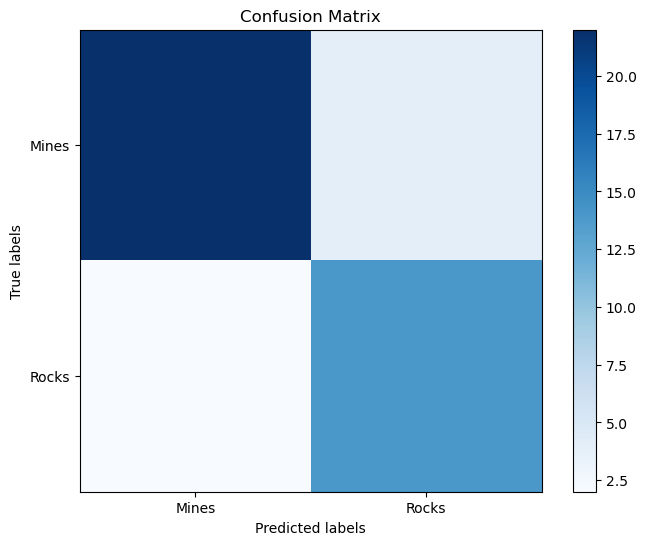

In \[30\]:

    import seaborn as sns

In \[31\]:

    # Plot histogram of features
    plt.figure(figsize=(15, 10))
    for i in range(60):
        plt.subplot(6, 10, i+1)
        sns.histplot(data.iloc[:, i], bins=10, kde=True, color='skyblue')
        plt.title("Feature {}".format(i+1))
    plt.tight_layout()
    plt.show()

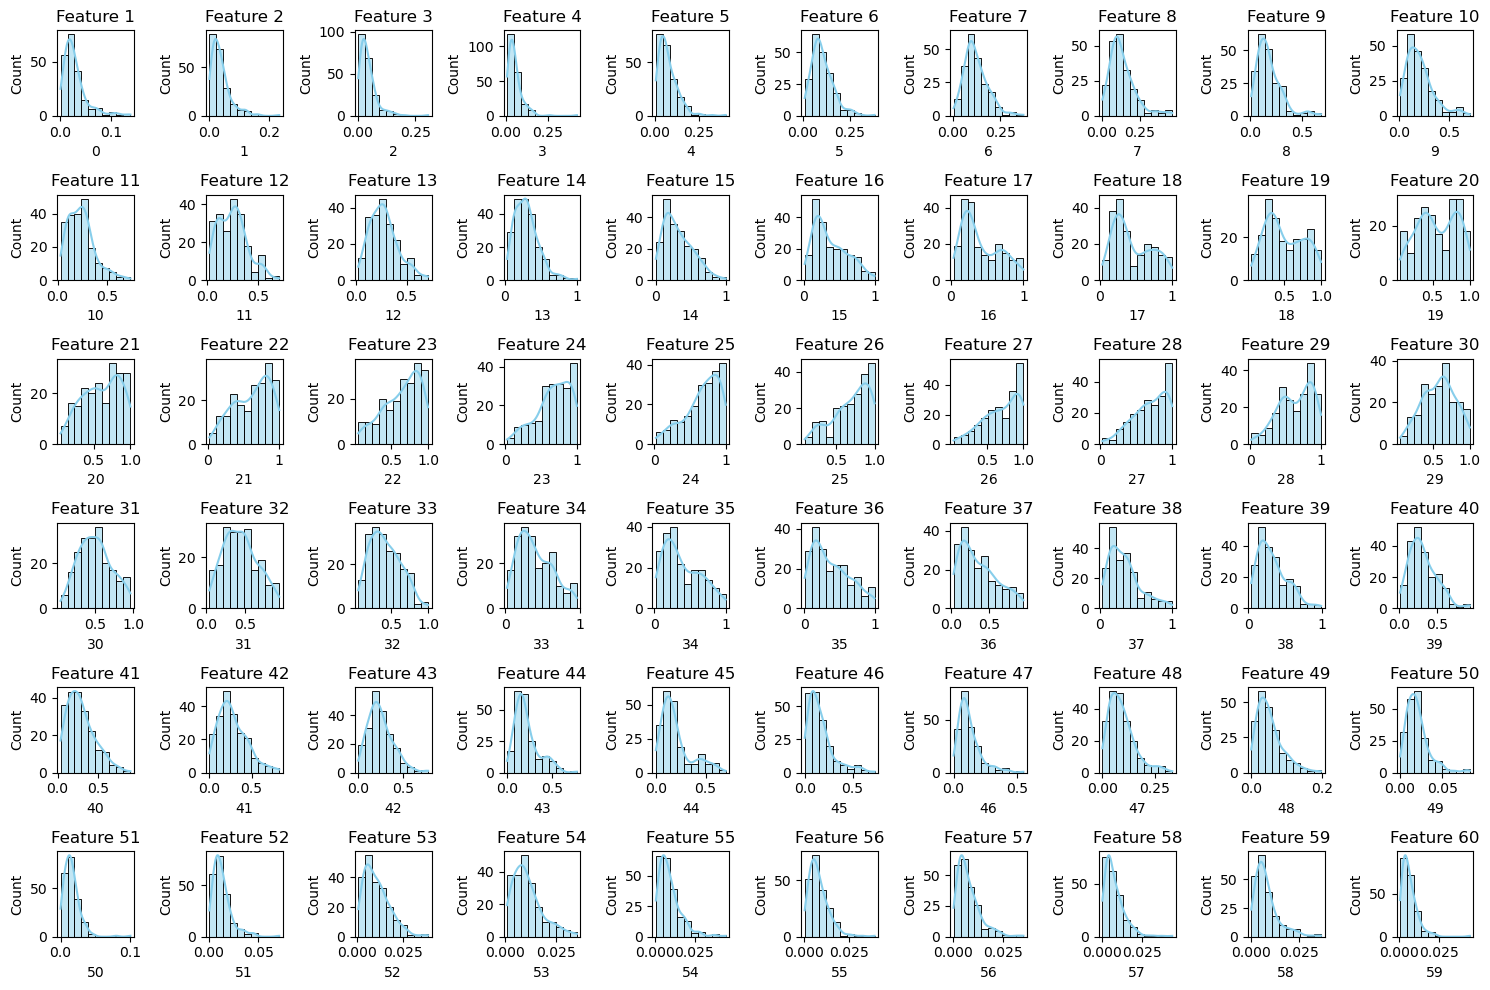

In \[ \]:

     

In \[ \]:

     

In \[ \]: